Average polarity: 0.04025076276301765
Median polarity: 0.1


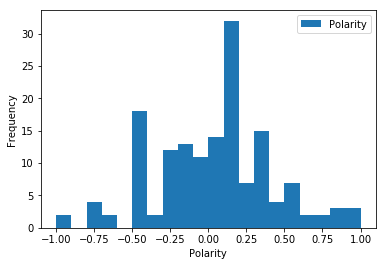

In [23]:
import tweepy
from tweepy import OAuthHandler
 
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

counter = 0

api = tweepy.API(auth)

from tweepy import Stream
from tweepy.streaming import StreamListener
import json
import string
import re

import nltk
import textblob
from textblob import TextBlob
import matplotlib.pyplot as plt

polarities = []

totalPolarity = 0
averagePolarity = 0

class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            with open('python.json', 'w+') as f:
                f.write(data)
                
                data_2 = json.loads(data)
                text_data = data_2['text']
                #print(text_data)
                
                chopped_data = str(text_data)
                
                mention = False
                
                if(len(text_data) > 4):
                    if(text_data[0] == 'R' and text_data[1] == 'T'):
                        #print("This statement has RT")
                        mention = True
                        chopped_data = chopped_data[3:]
                
                if(len(chopped_data) > 4):
                    if(chopped_data[0] == '@'):
                        chopped_data = chopped_data[1:]
                        mention = True
                    elif(chopped_data[1] == '@'):
                        chopped_data = chopped_data[2:]
                        mention = True
                
                if(mention == True):
                    try:
                        colonIndex = chopped_data.index(':')
                        chopped_data = chopped_data[colonIndex+1:]
                    except:
                        chopped_data = chopped_data
                
                chopped_data = text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', chopped_data)
                chopped_data = chopped_data.replace('#',"")
                chopped_data = chopped_data.replace('@',"")
                    
                if(chopped_data[0] == ' '):
                    chopped_data = chopped_data[1:]
                
                #print(chopped_data)
                
                newTextBlob = TextBlob(chopped_data)
                newPolarity = newTextBlob.polarity
                
                global polarities
                global counter
                global totalPolarity
                
                if(newPolarity != 0): # disregard if polarity is exactly 0. These typically occur when textblob is confused (for example, link or names in text).
                    polarities.append(newPolarity)
                    totalPolarity += newPolarity
                
                #print(newPolarity)
                
                #counter to hit 10 tweets
                counter += 1
                #print('_______________________')
                if(counter >= 300):
                    return False
                else:
                    return True
        except BaseException as e:
            error = "Error on_data: " + str(e)
            #print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        #print(status)
        if status == 420:
            return False
        else:
            return True
########
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['trump'])

#print("_____________POLARITY____________")

numValues = len(polarities)

averagePolarity = totalPolarity / numValues
print("Average polarity:",averagePolarity)

sortedBool = False

while(sortedBool == False):
    sortedBool = True
    for i in range(numValues-1):
        cur = polarities[i]
        nex = polarities[i+1]
        
        if(nex < cur):
            polarities[i] = nex
            polarities[i+1] = cur
            sortedBool = False
            
medianPolarity = polarities[numValues//2]
print("Median polarity:",medianPolarity)

plt.hist(polarities,label = "Polarity",bins=20)
plt.legend()
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()